In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

master_df = pd.read_csv("clean_master_dataset.csv",
                        parse_dates=['order_purchase_timestamp'])

In [6]:
# Create Order Month Column
master_df['order_month'] = master_df['order_purchase_timestamp'].dt.to_period('M')

In [8]:
# Create Cohort Month (First Purchase Month)
cohort_df = master_df.copy()

cohort_df['cohort_month'] = cohort_df.groupby('customer_unique_id')[
    'order_purchase_timestamp'
].transform('min').dt.to_period('M')

In [10]:
# Calculate Cohort Index (Month Difference)
cohort_df['cohort_index'] = (
    (cohort_df['order_month'] - cohort_df['cohort_month'])
    .apply(lambda x: x.n)
)

In [12]:
# Build Cohort Table
cohort_data = cohort_df.groupby(
    ['cohort_month', 'cohort_index']
)['customer_unique_id'].nunique().reset_index()

In [14]:
# Pivot Table (Retention Matrix)
cohort_pivot = cohort_data.pivot_table(
    index='cohort_month',
    columns='cohort_index',
    values='customer_unique_id'
)

In [16]:
# Convert to Retention Percentage
cohort_size = cohort_pivot.iloc[:, 0]

retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

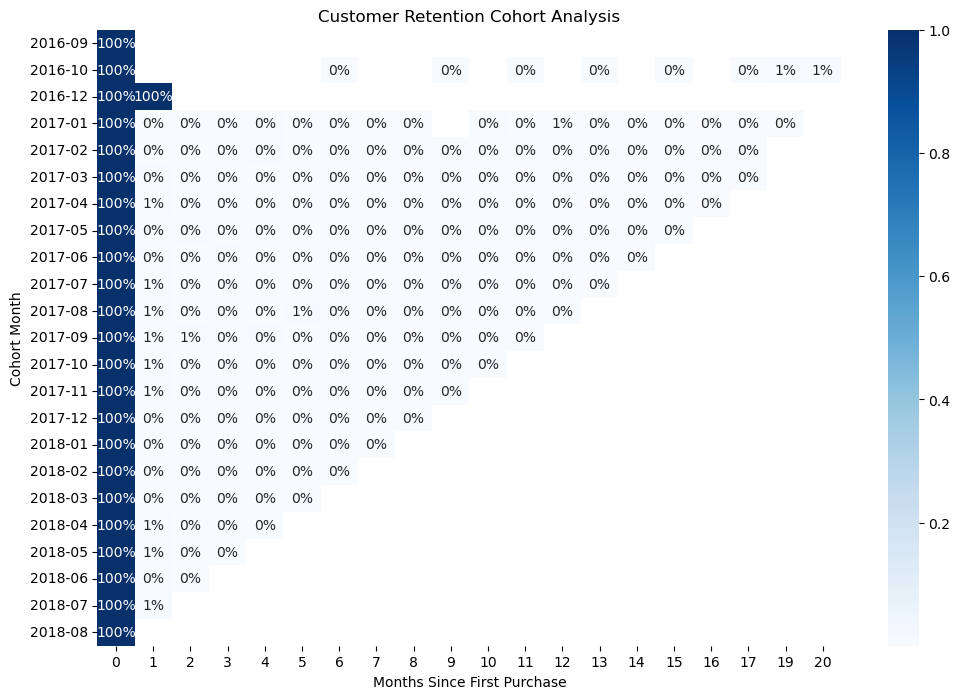

In [18]:
# Visualize (Heatmap)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(retention_matrix,
            annot=True,
            fmt=".0%",
            cmap="Blues")

plt.title("Customer Retention Cohort Analysis")
plt.ylabel("Cohort Month")
plt.xlabel("Months Since First Purchase")
plt.show()

Majority of customers do not return after first purchase.

Retention sharply drops after month 0.

Business heavily depends on customer acquisition.

This aligns with your RFM findings.